# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Estimating the distribution function


Suppose we don't know what the distribution function (DF) is?  We are not trying to estimate some fixed but unknown parameter $\theta^*$ for some RV we are assuming to be $Bernoulli(\theta^*)$, we are trying to estimate the DF itself.  In real life, data does not come neatly labeled "I am a realisation of a $Bernoulli$ RV", or "I am a realisation of an $Exponential$ RV": an important part of inference and estimation is to make inferences about the DF itself from our observations.   

### Observations from some unknown process
<img src="images/unknownProcessTimesAnim.gif" width=400>

Consider the following non-parametric product experiment:

$$X_1, X_2, \ldots, X_n\ \overset{IID}{\sim} F^* \in \{\text{all DFs}\}$$

We want to produce a point estimate for $F^*$, which is a allowed to be any DF ("lives in the set of all DFs"), i.e., $F^* \in \{\text{all DFs}\}$

Crucially, $\{\text{all DFs}\}$, i.e., the set of all distribution functions over $\mathbb{R}$ is infinite dimensional.

<img src="images/TwoDFs.png" width=400>

We have already seen an estimate, made using the data, of a distribution function:  the empirical or data-based distribution function (or empirical cumulative distribution function). This can be formalized as the following process of adding indicator functions of the half-lines beginning at the data points $[X_1,+\infty),[X_2,+\infty),\ldots,[X_n,+\infty)$:

$$\widehat{F}_n (x) = \frac{1}{n} \sum_{i=1}^n \mathbf{1}_{[X_i,+\infty)}(x)$$


where,

$$\mathbf{1}_{[X_i,+\infty)}(x) := \begin{cases} & 1 \quad \text{ if } X_i \leq x \\ & 0 \quad \text{ if }X_i > x \end{cases}$$

Lets take a look at this for an example

[[0.    0.368]
 [1.    0.734]
 [2.    0.919]
 [3.    0.982]
 [4.    0.997]
 [5.    0.999]
 [6.    1.   ]]


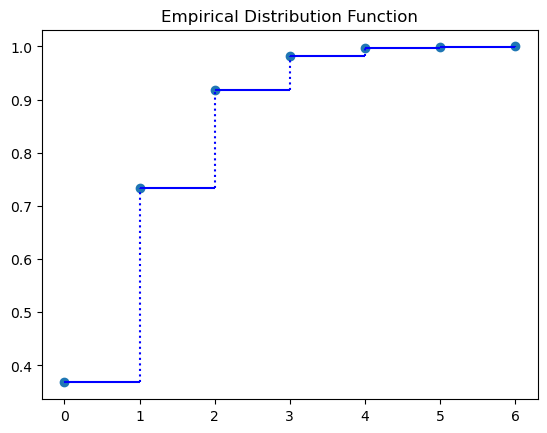

In [1]:
import numpy as np
X = np.random.poisson(1,size=1000)
from Utils import makeEDF, makeEMF, plotEDF
print(makeEDF(X))
plotEDF(makeEDF(X))

## Dvoretsky-Kiefer-Wolfowitz (DKW) Inequality

Let $X_1, X_2, \ldots, X_n \overset{IID}{\sim} F^* \in \{\text{all DFs}\}$

and the empirical distribution function (EDF) is $\widehat{F}_n(x) := \displaystyle\frac{1}{n} \sum_{i=1}^n \mathbf{1}_{[X_i,+\infty)}(x)$,

then, for any $\varepsilon > 0$,

$$P\left( \sup_x { | \widehat{F}_n(x) - F^*(x) | > \varepsilon  }\right) \leq 2 \exp(-2n\varepsilon^2) $$

We can use this inequality to get a $1-\alpha$ confidence band $C_n(x) := \left[\underline{C}_n(x), \overline{C}_n(x)\right]$ about our point estimate $\widehat{F}_n$ of our possibly unknown $F^*$ such that the $F^*$ is 'trapped' by the band with probability at least $1-\varepsilon$.

$$
\begin{aligned} 
    \underline{C}_{\, n}(x) &= \max \{ \widehat{F}_n(x)-\varepsilon_n, 0 \}, \notag \\ 
    \overline{C}_{\, n}(x) &= \min \{ \widehat{F}_n(x)+\varepsilon_n, 1 \}, \notag \\ 
    \varepsilon_n &= \sqrt{ \frac{1}{2n} \log \left( \frac{2}{\alpha}\right)} \\ 
\end{aligned}
$$

and

$$P\left(\underline{C}_n(x) \leq F^*(x) \leq \overline{C}_n(x)\right) \geq 1-\alpha$$

# Estimating the density

For a discrete random variable, estimating the density (pmf) is as simple as using the empirical pmf

In [ ]:
from Utils import plotEMF
print(makeEMF(X))
plotEMF(makeEMF(X))

## For a continuous random variable

For a continuous random variable we cannot really use the pmf, instead we consider something like a histogram

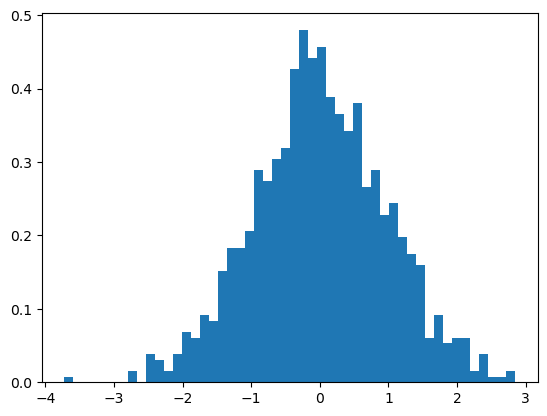

In [3]:
import matplotlib.pyplot as plt
import numpy as np
Y = np.random.normal(size=1000)
freq,bins,_ = plt.hist(Y,density = True, bins=50)

In [5]:
print("     Bin \t Freq")
for frq,l_edge,r_edge in zip(freq,bins,bins[1:]):
    print("[%.2f,%.2f] \t %.2f" % (l_edge,r_edge,frq))

     Bin 	 Freq
[-3.56,-3.43] 	 0.01
[-3.43,-3.30] 	 0.01
[-3.30,-3.16] 	 0.00
[-3.16,-3.03] 	 0.01
[-3.03,-2.89] 	 0.01
[-2.89,-2.76] 	 0.01
[-2.76,-2.63] 	 0.01
[-2.63,-2.49] 	 0.00
[-2.49,-2.36] 	 0.04
[-2.36,-2.22] 	 0.04
[-2.22,-2.09] 	 0.02
[-2.09,-1.96] 	 0.07
[-1.96,-1.82] 	 0.05
[-1.82,-1.69] 	 0.09
[-1.69,-1.55] 	 0.08
[-1.55,-1.42] 	 0.10
[-1.42,-1.29] 	 0.17
[-1.29,-1.15] 	 0.24
[-1.15,-1.02] 	 0.17
[-1.02,-0.88] 	 0.28
[-0.88,-0.75] 	 0.35
[-0.75,-0.62] 	 0.30
[-0.62,-0.48] 	 0.37
[-0.48,-0.35] 	 0.43
[-0.35,-0.21] 	 0.35
[-0.21,-0.08] 	 0.34
[-0.08,0.05] 	 0.40
[0.05,0.19] 	 0.42
[0.19,0.32] 	 0.36
[0.32,0.46] 	 0.40
[0.46,0.59] 	 0.30
[0.59,0.72] 	 0.44
[0.72,0.86] 	 0.24
[0.86,0.99] 	 0.22
[0.99,1.13] 	 0.22
[1.13,1.26] 	 0.11
[1.26,1.39] 	 0.13
[1.39,1.53] 	 0.16
[1.53,1.66] 	 0.10
[1.66,1.80] 	 0.10
[1.80,1.93] 	 0.05
[1.93,2.06] 	 0.07
[2.06,2.20] 	 0.03
[2.20,2.33] 	 0.02
[2.33,2.47] 	 0.04
[2.47,2.60] 	 0.01
[2.60,2.73] 	 0.01
[2.73,2.87] 	 0.01
[2.87,3.00] 	 0.01


Whenever we want to use a histogram estimator, we need to decide how many bins we are going to need. This is a topic for another day.

# Regression example of risk minimization

Consider the following house price data

In [10]:
import csv
data = []
header = []
with open('data/portland.csv', mode='r') as f:
    reader = csv.reader(f)
    header = tuple(next(reader))
    for row in reader:
        try:
            data.append((int(row[0]),int(row[1]),int(row[2])))
        except e:
            print(e)

In [11]:
print(header)
print(data[:1])

('Size of the house (in square feet)', 'Number of bedrooms', 'Price of the house')
[(2104, 3, 399900)]


Lets think that the data generator $X$ is here the size of the house and the $Y$ is the price of the house.

In [14]:
import numpy as np
D = np.array(data)
X = D[:,0]
Y = D[:,2]

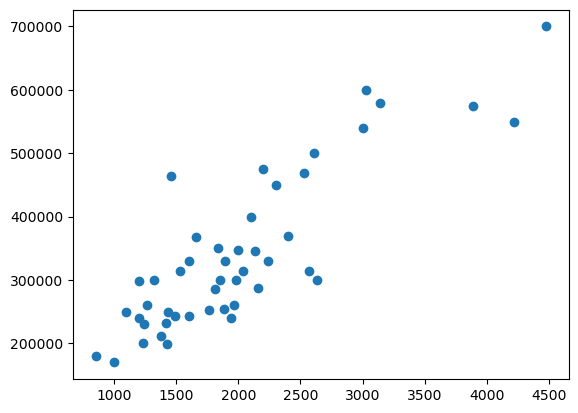

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X,Y)

## Linear regression

An example of a learning machine is linear regression with quadratic loss. What we have is essentially

* The loss is the quadratic function
* We are searching among linear functions, $g_{k,m}(x) = kx+m$.

$$
    k^\ast, m^\ast = \text{argmin}_{k,m}\frac{1}{n} \sum_{i=1}^n (k X_i + m - Y_i)^2
$$

In [17]:
R = lambda a: np.mean(np.power((a[0]*X+a[1]-Y),2))

In [18]:
import scipy.optimize as so

We can use scipy to minimize the total loss $L$ above. 

In [19]:
result = so.minimize(R,(0,0),method = 'Nelder-Mead')
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4116265480.866082
             x: [ 1.345e+02  7.127e+04]
           nit: 174
          nfev: 330
 final_simplex: (array([[ 1.345e+02,  7.127e+04],
                       [ 1.345e+02,  7.127e+04],
                       [ 1.345e+02,  7.127e+04]]), array([ 4.116e+09,  4.116e+09,  4.116e+09]))

This gives us that the found $k \approx 135$ and the found $m \approx 70000$, we can also plot this together with data to see

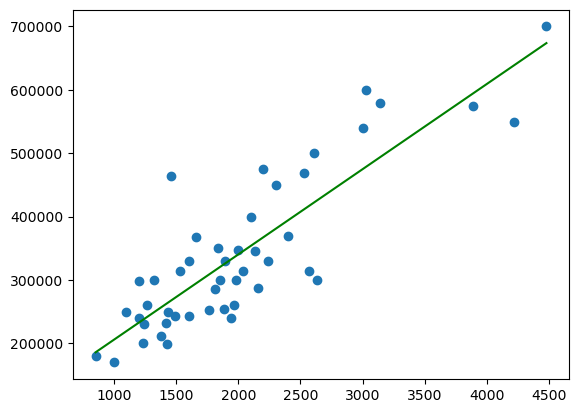

In [34]:
x_pred = np.linspace(np.min(X),np.max(X),2)
y_pred = x_pred*result['x'][0]+result['x'][1]
plt.scatter(X,Y)
plt.plot(x_pred,y_pred,color='green')